In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv('Training Data.csv')
data.head()

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1,1303835,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [54]:
print(data.isnull().sum())
print(data.dtypes)

Id                     0
income                 0
age                    0
experience             0
married                0
house_ownership        0
car_ownership          0
profession             0
city                   0
state                  0
current_job_years      0
current_house_years    0
risk_flag              0
dtype: int64
Id                      int64
income                  int64
age                     int64
experience              int64
married                object
house_ownership        object
car_ownership          object
profession             object
city                   object
state                  object
current_job_years       int64
current_house_years     int64
risk_flag               int64
dtype: object


In [55]:
from sklearn.preprocessing import OrdinalEncoder

data1=data.copy()
ord_enc = OrdinalEncoder()
columns=['married','house_ownership','car_ownership','profession','city','state']

for x in columns:
    data1[x] = ord_enc.fit_transform(data1[[x]])

data1.head()

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1,1303835,23,3,1.0,2.0,0.0,33.0,251.0,13.0,3,13,0
1,2,7574516,40,10,1.0,2.0,0.0,43.0,227.0,14.0,9,13,0
2,3,3991815,66,4,0.0,2.0,0.0,47.0,8.0,12.0,4,10,0
3,4,6256451,41,2,1.0,2.0,1.0,43.0,54.0,17.0,2,12,1
4,5,5768871,47,11,1.0,2.0,0.0,11.0,296.0,22.0,3,14,1


In [56]:
# Data normalized
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(data1)
data_normalized=pd.DataFrame(scaler.transform(data1),columns=data1.columns)
data_normalized.head()

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,0.000000,0.129487,0.034483,0.15,1.0,1.0,0.0,0.66,0.794304,0.464286,0.214286,0.75,0.0
1,0.000004,0.757206,0.327586,0.50,1.0,1.0,0.0,0.86,0.718354,0.500000,0.642857,0.75,0.0
2,0.000008,0.398564,0.775862,0.20,0.0,1.0,0.0,0.94,0.025316,0.428571,0.285714,0.00,0.0
3,0.000012,0.625263,0.344828,0.10,1.0,1.0,1.0,0.86,0.170886,0.607143,0.142857,0.50,1.0
4,0.000016,0.576454,0.448276,0.55,1.0,1.0,0.0,0.22,0.936709,0.785714,0.214286,1.00,1.0


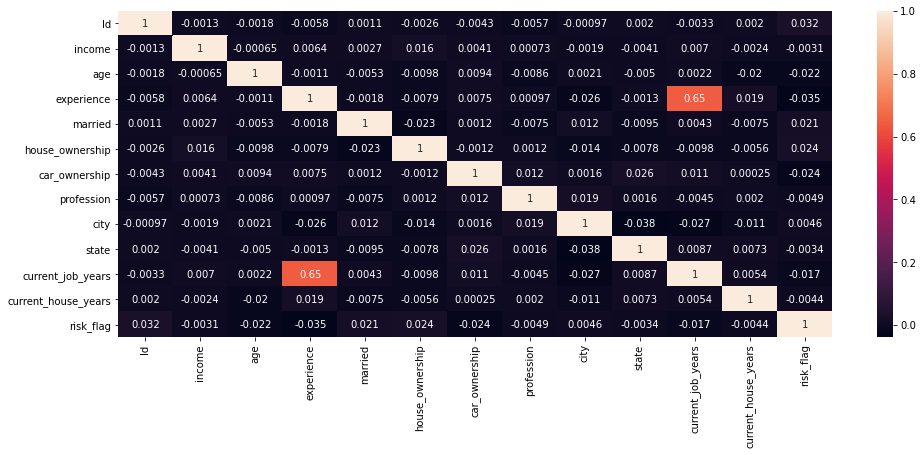

In [57]:
# Correlation
plt.figure(figsize=(16, 6))
sns.heatmap(data_normalized.corr(),annot=True)

In [58]:
data_normalized.describe()

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
count,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,0.500000,0.499198,0.499208,0.504222,0.897905,0.945861,0.301587,0.505535,0.500436,0.493177,0.452420,0.499448,0.123000
std,0.288677,0.288130,0.294205,0.300129,0.302774,0.195940,0.458948,0.294571,0.291778,0.334725,0.260504,0.349759,0.328438
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.249529,0.241379,0.250000,1.000000,1.000000,0.000000,0.260000,0.246835,0.214286,0.214286,0.250000,0.000000
50%,0.500000,0.499557,0.500000,0.500000,1.000000,1.000000,0.000000,0.520000,0.496835,0.500000,0.428571,0.500000,0.000000
75%,0.750000,0.747495,0.758621,0.750000,1.000000,1.000000,1.000000,0.760000,0.753165,0.785714,0.642857,0.750000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [59]:
data_normalized.shape

(252000, 13)

In [60]:
# split data
from sklearn.model_selection import train_test_split

X=data_normalized.drop(['risk_flag','Id'], axis=1)

y=data_normalized['risk_flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
# feature selection data dengan chi2
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,mutual_info_classif


selector=SelectKBest(chi2,k=5) 
selector.fit(X_train,y_train)
X_train_new=selector.transform(X_train)
X_test_new=selector.transform(X_test)

selected_columns=[]
for i,j in zip(X.columns,selector.get_support()):
    if j==True:
        selected_columns.append(i)
selected_columns

['income', 'age', 'experience', 'city', 'current_job_years']

In [62]:
# model 1 (NB)
from sklearn.naive_bayes import GaussianNB,CategoricalNB,BernoulliNB,MultinomialNB

model1=GaussianNB() # hasil gausian dll sama
model1.fit(X_train_new,y_train)
model1.score(X_test_new,y_test)

0.8759325396825397

In [71]:
# model 2 (KNN)  
from sklearn.neighbors import KNeighborsClassifier

model2 = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

model2.fit(X_train_new,y_train)

print(model2.score(X_test_new,y_test))


0.8873809523809524


In [64]:
# Super Vector Machine
from sklearn.svm import SVC

model3 = SVC(kernel='rbf',decision_function_shape='ovr')
model3.fit(X_train_new,y_train)
print (model3.score(X_test_new,y_test))


0.8759325396825397


In [65]:
# Neural network
from sklearn.neural_network import MLPClassifier
model4=MLPClassifier(hidden_layer_sizes=(50,50),activation='relu',max_iter=1000)

model4.fit(X_train_new, y_train)
print(model4.score(X_test_new,y_test))



0.875734126984127


## Model terbaik menggunakan KNeighborsClassifier: 88.73%

In [66]:
# membuat pipline (optional: bisa untuk running model di file yang berbeda, save model in pickle or joblib file)

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,mutual_info_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
import joblib
from sklearn.preprocessing import OrdinalEncoder

data=pd.read_csv('Training Data.csv')
data1=data.copy()
ord_enc = OrdinalEncoder()
columns=['married','house_ownership','car_ownership','profession','city','state']

for x in columns:
    data1[x] = ord_enc.fit_transform(data1[[x]])

X = data1.drop(['risk_flag','Id'], axis=1)

y = data1['risk_flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


estimators= [("selector",SelectKBest(chi2,k=5)),
             ("scaler",MinMaxScaler()),
             ("classifier",KNeighborsClassifier(n_neighbors=5, metric='euclidean'))
    
]
pipe=Pipeline(estimators)
pipe.fit(X_train,y_train)


with open('pipeline.pkl','wb') as f:
    joblib.dump(pipe,f)

In [67]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pipe.predict(X_test)))

pipe.score(X_test,y_test)

              precision    recall  f1-score   support

           0       0.91      0.96      0.94     44147
           1       0.57      0.34      0.43      6253

    accuracy                           0.89     50400
   macro avg       0.74      0.65      0.68     50400
weighted avg       0.87      0.89      0.87     50400



0.8868253968253968

In [73]:
test_data=pd.read_csv('Test Data.csv')

ord_enc = OrdinalEncoder()
columns=['married','house_ownership','car_ownership','profession','city','state']

for x in columns:
    test_data[x] = ord_enc.fit_transform(test_data[[x]])

test_data=test_data.drop('id',axis=1)    
test_data.head()

,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years
0,7393090,59,19,1.0,2.0,0.0,26.0,181.0,28.0,4,13
1,1215004,25,5,1.0,2.0,0.0,24.0,131.0,14.0,5,10
2,8901342,50,12,1.0,2.0,0.0,30.0,290.0,14.0,9,14
3,1944421,49,9,0.0,2.0,1.0,1.0,171.0,14.0,3,12
4,13429,25,18,1.0,2.0,1.0,12.0,39.0,28.0,13,11


In [74]:
test_data['result_predict']=pipe.predict(test_data)
test_data.head(100)

,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,result_predict
0,7393090,59,19,1.0,2.0,0.0,26.0,181.0,28.0,4,13,0
1,1215004,25,5,1.0,2.0,0.0,24.0,131.0,14.0,5,10,0
2,8901342,50,12,1.0,2.0,0.0,30.0,290.0,14.0,9,14,0
3,1944421,49,9,0.0,2.0,1.0,1.0,171.0,14.0,3,12,0
4,13429,25,18,1.0,2.0,1.0,12.0,39.0,28.0,13,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,5535441,66,0,1.0,2.0,0.0,19.0,211.0,14.0,0,13,0
96,9249971,69,4,1.0,2.0,0.0,37.0,221.0,20.0,4,14,0
97,486603,33,20,1.0,2.0,0.0,31.0,44.0,20.0,5,13,0
98,7505485,27,17,1.0,2.0,1.0,39.0,91.0,22.0,12,12,1
